## Cross-validation for parameter tuning, model selection, and feature selection

- What is the drawback of using the train/test split procedure for model evaluation?
- How does K-fold cross-validation overcome this limitation?
- How can cross-validation be used for selecting tuning parameters, choosing between models, and selecting features?
- What are some possible improvements to cross-validation?

### model evaluation procedures
**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on out-of-sample data

**Initial idea:** Train and test on the same data

- But, maximizing training accuracy rewards overly complex models which overfit the training data

**Alternative idea:** Train/test split

- Split the dataset into tarin and test set, so that the model can be trained and tested on different data
- Testing accuracy is a better estimate than training accuracy of out-of-sample performance
- But, it provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
(np.random.randint(1,100,2))

array([30, 35])

In [5]:
# use train/test split with different random_state values
run_int = (np.random.randint(1,100,7))

for i in run_int:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
   # print("trg data:",X_train)
    # check classification accuracy of KNN with K=5
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158
1.0
0.9473684210526315
1.0
0.9736842105263158
0.9210526315789473
0.9736842105263158


**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

### Steps for K-fold cross-validation
1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the training set.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.


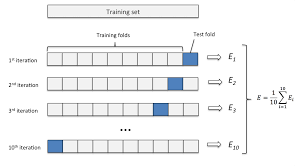

In [6]:
from IPython.display import Image, display
Image(filename = 'kfold.png', width = 700, height = 700)

In [7]:
# simulate splitting a dataset of 10 observations into 10 folds
from sklearn.model_selection import KFold
x = np.arange(0,10)
print(x)
kf = KFold(n_splits=10, shuffle=False, random_state = 123).split(range(10))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

[0 1 2 3 4 5 6 7 8 9]
Iteration                   Training set observations                   Testing set observations
    1     [1 2 3 4 5 6 7 8 9]            [0]           
    2     [0 2 3 4 5 6 7 8 9]            [1]           
    3     [0 1 3 4 5 6 7 8 9]            [2]           
    4     [0 1 2 4 5 6 7 8 9]            [3]           
    5     [0 1 2 3 5 6 7 8 9]            [4]           
    6     [0 1 2 3 4 6 7 8 9]            [5]           
    7     [0 1 2 3 4 5 7 8 9]            [6]           
    8     [0 1 2 3 4 5 6 8 9]            [7]           
    9     [0 1 2 3 4 5 6 7 9]            [8]           
   10     [0 1 2 3 4 5 6 7 8]            [9]           


/Users/pramodgupta/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


- Dataset contains 10 observations (numbered 0 through 9)
- 10-fold cross-validation, thus it runs for 10 iterations
- For each iteration, every observation is either in the training set or the testing set, but not both
- Every observation is in the testing set exactly once


**Comparing cross-validation to train/test split**

Advantages of cross-validation:

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

**Advantages of train/test split:**

Runs K times faster than K-fold cross-validation
Simpler to examine the detailed results of the testing process

### Cross-validation recommendations
1. K can be any number, but K=10 is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's cross_val_score function does this by default

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
accuracy_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(accuracy_score)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
# use average accuracy as an estimate of out-of-sample accuracy
print("Average Accuracy: ",accuracy_score.mean(), "Standard Dev:", accuracy_score.std())

Average Accuracy:  0.9666666666666668 Standard Dev: 0.04472135954999579


In [11]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(knn, X_test,y_test, cv = 10)

In [12]:
accuracy = metrics.r2_score(y_test, pred)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.9283018867924528


In [13]:
# K-Fold not using cross_val_score  

accuracy = []
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
 
scores

Train Index:  [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 

/Users/pramodgupta/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 0.8666666666666667,
 1.0,
 0.8666666666666667,
 0.8,
 1.0]

### KFold idea

See some details. 


In [14]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

In [15]:
X.shape

(4, 2)

In [16]:
for trn_idx, tst_idx in kf.split(X):
        print(trn_idx, tst_idx)
        

[2 3] [0 1]
[0 1] [2 3]


In [17]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
